In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn import datasets

In [2]:
#读取数据无列名
df1 = pd.read_csv('D:/file/course4DMA/coursework/course_project/breast-cancer-wisconsin.csv',
                 header='infer',
                 names=['Sample_code_number',
                    'Clump_Thickness',
                    'Uniformity_of_Cell_Size',
                    'Uniformity_of_Cell_Shape',
                    'Marginal_Adhesion',
                    'Single_Epithelial_Cell_Size',
                    'Bare_Nuclei',
                    'Bland_Chromatin',
                    'Normal_Nucleoli',
                    'Mitoses',
                    'Class'])

In [3]:
#异常值剔除
df1 = df1[df1['Bare_Nuclei'] != '?']

In [4]:
#划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(df1[['Clump_Thickness',
        'Uniformity_of_Cell_Size',
        'Uniformity_of_Cell_Shape',
        'Marginal_Adhesion',
        'Single_Epithelial_Cell_Size',
        'Bare_Nuclei',
        'Bland_Chromatin',
        'Normal_Nucleoli',
        'Mitoses']], df1['Class'], test_size=0.2)

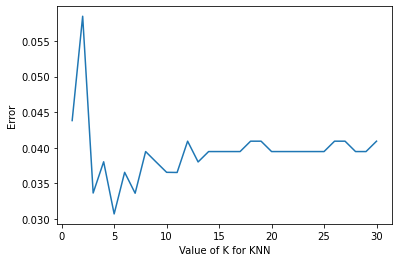

In [5]:
x = df1[['Clump_Thickness',
        'Uniformity_of_Cell_Size',
        'Uniformity_of_Cell_Shape',
        'Marginal_Adhesion',
        'Single_Epithelial_Cell_Size',
        'Bare_Nuclei',
        'Bland_Chromatin',
        'Normal_Nucleoli',
        'Mitoses']]
y = df1['Class']
k_range = range(1, 31)
k_error = []
#循环，取k=1到k=31，查看误差效果
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #cv参数决定数据集划分比例，这里是按照4:1划分训练集和测试集
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    k_error.append(1 - scores.mean())
#画图，x轴为k值，y值为误差值
plt.plot(k_range, k_error)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()

In [6]:
# 对数据进行归一化处理
standarScaler = StandardScaler()
standarScaler.fit(X_train)
X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)

In [7]:
#模型训练
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_std,y_train)
score = knn_clf.score(X_test_std, y_test)

In [8]:
score

0.9708029197080292